<a href="https://colab.research.google.com/github/souchem23/data-science-coursework/blob/main/Unit9/SoumikChemudupati_Unit9_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Preparation/Imports**

In [1]:
#Imports and packages

import torch
from torch import nn
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

## **Learning About Image Classification**

###**Dataset Introduction**

In order to investigate neural networks further, I am going to look a little bit into image classification. I will first work with the CIFAR-10 dataset so that I can apply the model architecture from the notes to an image-based dataset.

I will be using the CIFAR-10 dataset as it is an industry standard for image classification. The CIFAR-10 dataset contains a bunch of different image classes, and I will be training a neural network to try and classify all 10 of the classes.

###**Model Creation**

In [38]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# print(cifar_dataset)
#Loading the images
X = torch.stack([i[0] for i in cifar_dataset]) #Note that using the .stack() method inherently calls the tensor() function. From my knowledge.
#Loading the labels
y = torch.tensor([i[1] for i in cifar_dataset])

In [39]:
print(y)

tensor([6, 9, 9,  ..., 9, 1, 1])


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train = X_train[:1000]
y_train = y_train[:1000]
X_test = X_test[:1000]
y_test = y_test[:1000]

In [41]:
# Define the model architecture
# Going to have to use a Conv2d and MaxPool2d layer since I am investigating image data.
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(64 * 16 * 16, 256),
    nn.Linear(256, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [45]:
epochs = 5

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = criterion(test_pred, y_test)

    print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 1.59747, Test loss: 1.83383
Epoch: 1 | Train loss: 1.52501, Test loss: 1.78325
Epoch: 2 | Train loss: 1.41735, Test loss: 1.77984
Epoch: 3 | Train loss: 1.34220, Test loss: 1.82037
Epoch: 4 | Train loss: 1.31756, Test loss: 1.83527


In [46]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)

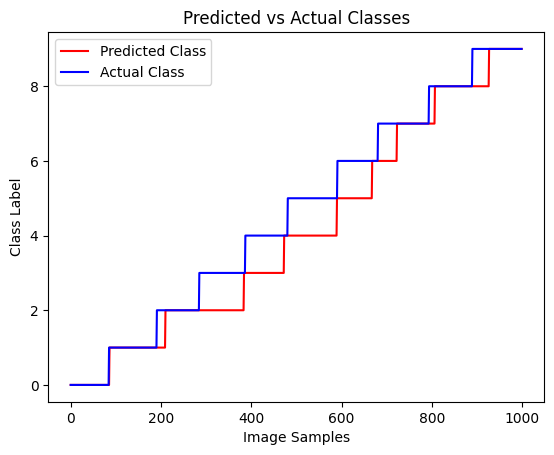

In [47]:
predicted_class = torch.argmax(y_pred, dim=1)

sorted_predicted_class = sorted(predicted_class)
sorted_y_test = sorted(y_test.numpy())

plt.plot(sorted_predicted_class, label="Predicted Class", color='r')
plt.plot(sorted_y_test, label="Actual Class", color='b')

# Add labels and title
plt.xlabel('Image Samples')
plt.ylabel('Class Label')
plt.title('Predicted vs Actual Classes')
plt.legend()

# Show the plot
plt.show()

###**Analysis**

In order to actually view how effective model, I am going to sort all of the image samples by order of class. Then, I am going to sort them and then graph the predicted vs. actual classes to see how accurate the model is. Then, I can match the lines and then see how accurate the model is. From the graph above, we can see that the model is actually quite accurate, with the blue lines and red lines overlapping fo class 1. Thus, class 4 is the most accurate. However, the model itself is actually NOT that great. Onlt a few classes actually match up, with the predicted classes being much smaller than the actual classes. For example, the model will predict a class of 2 when the class is actually a 3, observable around samples 300 to 400.

##**Vehicle+Animal Image Classification**

###**Dataset Introduction**

For this part of the project, I am going to apply what I have learned and create an image classification model on the STL10 dataset. This is also an industry standard and is used mainly for vehicular images. However, there are also a few images about animals as well so that the robustness of neural networks can be tested.

###**Final Model Creation**

The first step is to create a transformer to actually represent the images into a new format. I am now able to represent the pixels as a vector format due to the transformer.

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

carData = datasets.STL10(root='./data', download=True, transform=transform)

#Loading the images
X = torch.stack([i[0] for i in carData]) #Note that using the .stack() method inherently calls the tensor() function. From my knowledge.
#Loading the labels
y = torch.tensor([i[1] for i in carData])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train = X_train[:1000]
y_train = y_train[:1000]
X_test = X_test[:1000]
y_test = y_test[:1000]

Now, we need to actually create the images from the URLs...

In [4]:
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.MaxPool2d(2, 2),
    nn.MaxPool2d(2, 2),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(64 * 12 * 12, 256),
    nn.ReLU(),
    nn.Linear(256, 10),
    nn.ReLU()
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [5]:
epochs = 50

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = criterion(test_pred, y_test)

    print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 2.30245, Test loss: 2.49163
Epoch: 1 | Train loss: 2.41416, Test loss: 2.22741
Epoch: 2 | Train loss: 2.19426, Test loss: 2.16590
Epoch: 3 | Train loss: 2.12129, Test loss: 2.13381
Epoch: 4 | Train loss: 2.08028, Test loss: 2.08143
Epoch: 5 | Train loss: 2.01854, Test loss: 2.02431
Epoch: 6 | Train loss: 1.95152, Test loss: 1.98356
Epoch: 7 | Train loss: 1.90023, Test loss: 1.94126
Epoch: 8 | Train loss: 1.84524, Test loss: 1.91146
Epoch: 9 | Train loss: 1.79933, Test loss: 1.88969
Epoch: 10 | Train loss: 1.75567, Test loss: 1.86489
Epoch: 11 | Train loss: 1.70141, Test loss: 1.84461
Epoch: 12 | Train loss: 1.64678, Test loss: 1.82823
Epoch: 13 | Train loss: 1.59451, Test loss: 1.81038
Epoch: 14 | Train loss: 1.54086, Test loss: 1.78837
Epoch: 15 | Train loss: 1.48637, Test loss: 1.76177
Epoch: 16 | Train loss: 1.42858, Test loss: 1.73650
Epoch: 17 | Train loss: 1.36797, Test loss: 1.72049
Epoch: 18 | Train loss: 1.30622, Test loss: 1.71632
Epoch: 19 | Train loss

KeyboardInterrupt: 

OK, I ended up stopping it early. We can clearly see signs of overtiffing, as the test losses have continued to increase despite the training losses increases. This shows that, although, the model is learning the training data very well, it is identifying patterns and outliers that are too strong, looking at noise as real patterns and overfitting the data. I will rerun the model with a lower epoch size now.

In [5]:
epochs = 20

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = criterion(test_pred, y_test)

    print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 2.30539, Test loss: 2.18908
Epoch: 1 | Train loss: 2.13973, Test loss: 2.18871
Epoch: 2 | Train loss: 2.14883, Test loss: 2.06025
Epoch: 3 | Train loss: 1.97877, Test loss: 2.03802
Epoch: 4 | Train loss: 1.92071, Test loss: 1.99323
Epoch: 5 | Train loss: 1.82253, Test loss: 1.96892
Epoch: 6 | Train loss: 1.75465, Test loss: 1.94045
Epoch: 7 | Train loss: 1.68553, Test loss: 1.90273
Epoch: 8 | Train loss: 1.60614, Test loss: 1.84340
Epoch: 9 | Train loss: 1.50826, Test loss: 1.80086
Epoch: 10 | Train loss: 1.42928, Test loss: 1.76626
Epoch: 11 | Train loss: 1.36342, Test loss: 1.72992
Epoch: 12 | Train loss: 1.29856, Test loss: 1.68945
Epoch: 13 | Train loss: 1.21962, Test loss: 1.66642
Epoch: 14 | Train loss: 1.14929, Test loss: 1.65450
Epoch: 15 | Train loss: 1.08069, Test loss: 1.65738
Epoch: 16 | Train loss: 1.01483, Test loss: 1.65177
Epoch: 17 | Train loss: 0.93909, Test loss: 1.65073
Epoch: 18 | Train loss: 0.86451, Test loss: 1.67074
Epoch: 19 | Train loss

In [6]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)

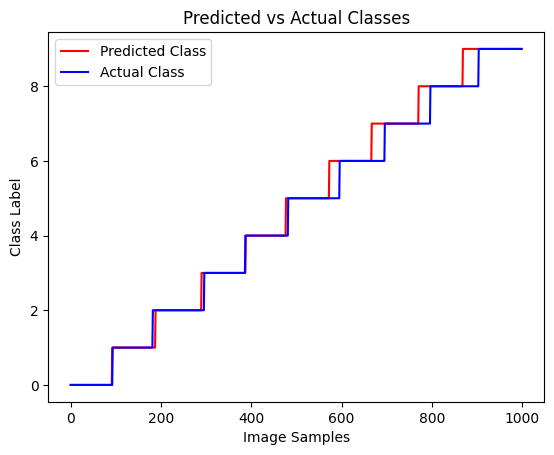

In [31]:
predicted_class = torch.argmax(y_pred, dim=1)

sorted_predicted_class = sorted(predicted_class)
sorted_y_test = sorted(y_test.numpy())

plt.plot(sorted_predicted_class, label="Predicted Class", color='r')
plt.plot(sorted_y_test, label="Actual Class", color='b')

# Add labels and title
plt.xlabel('Image Samples')
plt.ylabel('Class Label')
plt.title('Predicted vs Actual Classes')
plt.legend()

# Show the plot
plt.show()

###**Analysis**

This model is quite good. We can see that for classes 0 through 5, the model is near perfect. The predicted and actual classes line up really well. However, past the 5th class prediction, the predicted classes seem to be a lot less for the actual classes for the later samples. This is lkely a sign of the overfitting, but it is possible that these later classesa are just harder. We can see that the fact that the curves match up quite nicely, only ocassionaly differing by 1 or 2 labels. In comparison to my first model where the models were off by 1 or more lables for hundreds of samples in a row, my model was only off by 1 sample for a few samples. Thus, with increased training time, my model was able to perform much more accurately.

SAMPLE 6
TRUE CLASS 0  ---> AIRPLANE
PREDICTED CLASS 0  ---> AIRPLANE


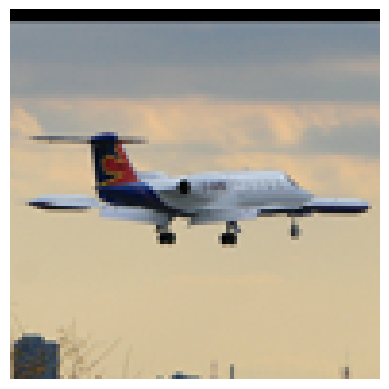

In [34]:
val = 5
image_tensor = X_test[val]

pred_class = predicted_class[val].item()
true_class = y_test[val].item()
print("SAMPLE 6")
print("TRUE CLASS", true_class, " ---> AIRPLANE")
print("PREDICTED CLASS", pred_class, " ---> AIRPLANE")

image_tensor = image_tensor * 0.5 + 0.5
image_np = image_tensor.permute(1, 2, 0).numpy()
plt.imshow(image_np)
plt.axis('off')
plt.show()

The following is an example of an image that the model accurately predicted. The model predicted that the above image was an airplane.

SAMPLE 10
TRUE CLASS 5  ---> DOG
PREDICTED CLASS 6  ---> HORSE


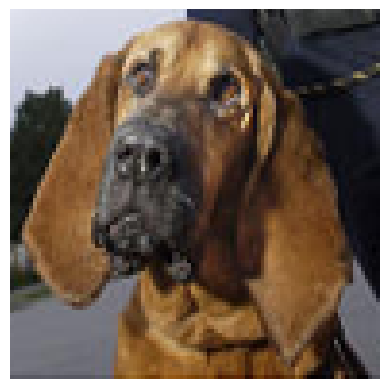

In [37]:
val = 11
image_tensor = X_test[val]

pred_class = predicted_class[val].item()
true_class = y_test[val].item()
print("SAMPLE 10")
print("TRUE CLASS", true_class, " ---> DOG")
print("PREDICTED CLASS", pred_class, " ---> HORSE")

image_tensor = image_tensor * 0.5 + 0.5
image_np = image_tensor.permute(1, 2, 0).numpy()
plt.imshow(image_np)
plt.axis('off')
plt.show()

The following is an example of an image incorrectly predicted by the model. The model thought that the dog was a horse, which is a fair prediction given that the model only trained for 20 epochs.

###**Concluding Thoughts**

In general, the use of image classificaiton is extremely cool! It's possible that there was some overfitting, causing small nuances to cause incorrect predictions such as the dog vs. horse example. I have learned that it is important to optimize training time and as well as the configuration of the model (epochs), to prevent overfitting and improve overall model predictions.